## First, walking through LinKK portion in "Validation of EIS data" example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../../')

from impedance.validation import linKK

%reload_ext autoreload
%autoreload 2

In [2]:
# read data
data = np.genfromtxt('data/exampleData.csv', delimiter=',')

f = data[:,0]
Z = data[:,1] + 1j*data[:,2]

mask = f < 1000
f = f[mask]
Z = Z[mask]

In [3]:
M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, max_M=100)

print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.2f}'.format(M, mu))

10 1.0 0.00022662281947617854

Completed Lin-KK Fit
M = 13
mu = 0.82


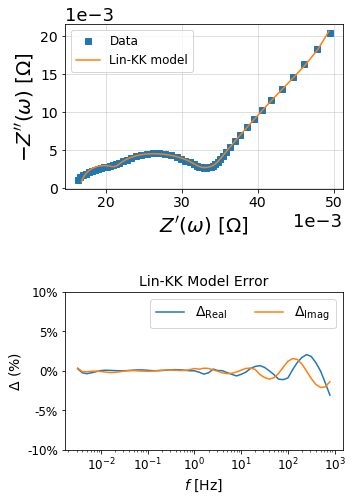

In [4]:
from impedance.visualization import plot_nyquist

fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(ax1, Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'$\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'$\Delta_{\mathrm{Imag}}$')
ax2.set_title('Lin-KK Model Error', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

In [5]:
Chi_Im = 1 / len(res_imag) * (np.sum(res_imag)) **2
Chi_Im

4.624867068239577e-05

In [6]:
# Number of decades in frequency range
N_decade = np.log10(f[-1]) - np.log10(f[0])

In [8]:
# Use linKK to get imaginary chi-squared for using a number of RC-elements
# ranging from 1 to 7 per frequency decade.
# Note: This may take several minutes to evaluate

M_range = np.arange(1, int(np.ceil(7 * N_decade)))
Chi_Im = []
mus = []
Z_linKKs = []

for M in M_range:
    M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=None, max_M=M)
    Chi_Im.append(1 / len(res_imag) * (np.sum(res_imag)) **2)
    mus.append(mu)
    Z_linKKs.append(Z_linKK)

mus = np.array(mus)
Z_linKKs = np.array(Z_linKKs)

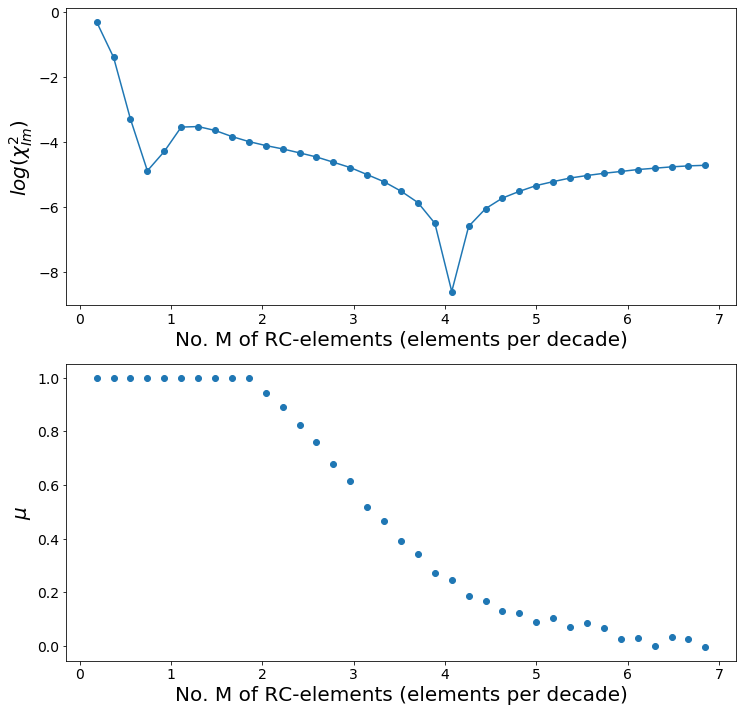

In [9]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(12,12))

ax0.plot(M_range/N_decade, np.log10(Chi_Im), 'o-')
ax1.plot(M_range/N_decade, mus, 'o')

# Set labels
ax0.set_xlabel('No. M of RC-elements (elements per decade)', fontsize=20)
ax0.set_ylabel(r'$log({\chi} ^2_{Im})$', fontsize=20)

ax1.set_xlabel('No. M of RC-elements (elements per decade)', fontsize=20)
ax1.set_ylabel(r'$\mu$', fontsize=20)

# Make tick labels larger
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [10]:
from impedance.valid_BG import linKK as linKK2

In [11]:
# Standard result

M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, max_M=20) # , c=None, max_M=6)
print(M, mu, np.sum(res_real**2), np.sum(res_imag**2))

10 1.0 0.00022662281947617854
13 0.822604834442276 0.003041034765976491 0.002531284345177548


In [24]:
# Using my function

M2, mu2, Z_linKK2, res_real2, res_imag2 = linKK2(f, Z, max_M=20) # , c=None, max_M=6)
print(M2, mu2, np.sum(res_real2**2), np.sum(res_imag2**2))

10 0.9801018109562196 0.0010767735696731076
12 0.8429214985317621 0.015717998580953685 0.006015183384143615


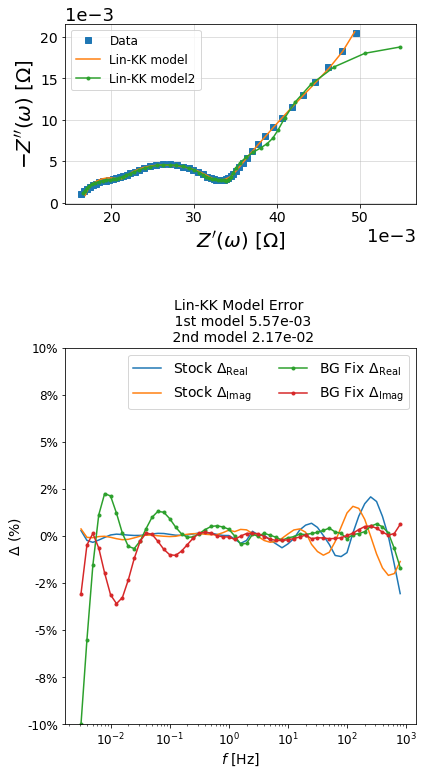

In [25]:
fig, (ax1, ax2)  = plt.subplots(nrows=2, figsize=(6,12))

# plot original data
plot_nyquist(ax1, Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')
plot_nyquist(ax1, Z_linKK2, fmt='.-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model', 'Lin-KK model2'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(f, res_real, '-', label=r'Stock $\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag, '-', label=r'Stock $\Delta_{\mathrm{Imag}}$')

ax2.plot(f, res_real2, '.-', label=r'BG Fix $\Delta_{\mathrm{Real}}$')
ax2.plot(f, res_imag2, '.-', label=r'BG Fix $\Delta_{\mathrm{Imag}}$')

ax2.set_title('Lin-KK Model Error ' + '\n 1st model %.2e' % np.sum(res_real**2 + res_imag**2)
              + '\n 2nd model %.2e' % np.sum(res_real2**2 + res_imag2**2), fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

# Now let's look at some simulated data...

Simulating circuit based on initial parameters


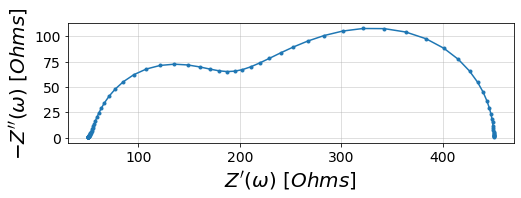

In [29]:
from impedance.models.circuits import CustomCircuit

# Simulate circuit with a Gerischer element

circ = 'R0-p(R1,C1)-G1'

vals = [50, 100, 1e-4, 300, 1]

circuit = CustomCircuit(circ, initial_guess=vals)

sim_f = np.logspace(np.log10(1e5), np.log10(1e-3), num = 81)

sim_Z = circuit.predict(sim_f, use_initial=True)

fig, ax0 = plt.subplots(figsize=(8,8))
plot_nyquist(ax0, sim_Z)

In [30]:
# Using stock lin KK

sim_M, sim_mu, sim_Z_linKK, sim_res_real, sim_res_imag = linKK(sim_f, sim_Z, max_M=20)
print(sim_M, sim_mu, np.sum(sim_res_real**2), np.sum(sim_res_imag**2))

4 0.6480468236914341 2.23018028117201 1.4321266892051479


In [31]:
# Using my corrections to time constant assignment and spacing, 
# and converting to radial frequencies in the RC-element for lin-KK model
# now called H

sim_M2, sim_mu2, sim_Z_linKK2, sim_res_real2, sim_res_imag2 = linKK2(sim_f, sim_Z, max_M=50)
print(sim_M2, sim_mu2, np.sum(sim_res_real2**2), np.sum(sim_res_imag2**2))

10 0.9341432823377479 8.842048529222076
20 0.9201497844074834 0.36331047545254336
30 0.9234317880359013 0.020106272723981064
40 0.8856776349709982 0.0020512160751488674
42 0.8402835904784075 3.550246923413681e-09 3.963246977934687e-09


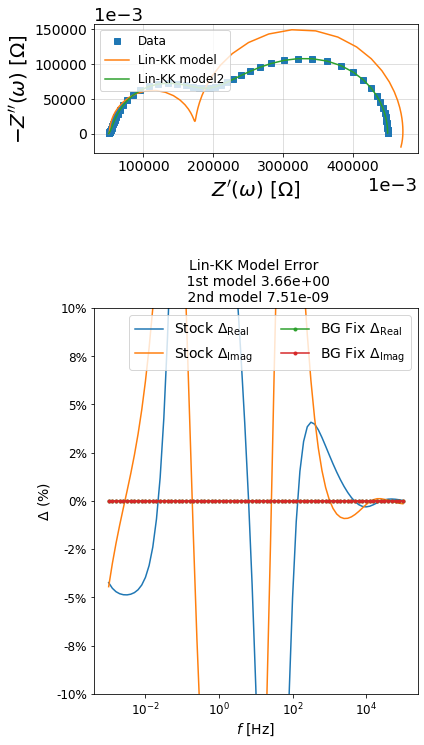

In [32]:
fig, (ax1, ax2)  = plt.subplots(nrows=2, figsize=(6,12))

# plot original data
plot_nyquist(ax1, sim_Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, sim_Z_linKK, fmt='-', scale=1e3, units='\Omega')
plot_nyquist(ax1, sim_Z_linKK2, fmt='-', scale=1e3, units='\Omega')


ax1.legend(['Data', 'Lin-KK model', 'Lin-KK model2'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(sim_f, sim_res_real, '-', label=r'Stock $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag, '-', label=r'Stock $\Delta_{\mathrm{Imag}}$')

ax2.plot(sim_f, sim_res_real2, '.-', label=r'BG Fix $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag2, '.-', label=r'BG Fix $\Delta_{\mathrm{Imag}}$')

ax2.set_title('Lin-KK Model Error ' + '\n 1st model %.2e' % np.sum(sim_res_real**2 + sim_res_imag**2)
              + '\n 2nd model %.2e' % np.sum(sim_res_real2**2 + sim_res_imag2**2), fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

## Now let's try simulating data that looks more like the example data

Simulating circuit based on initial parameters


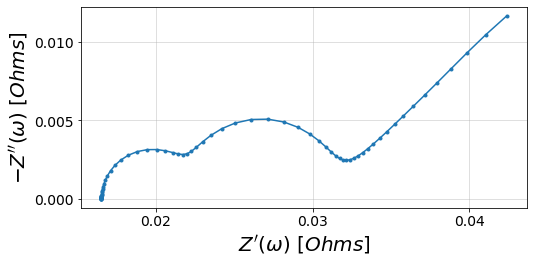

In [33]:
# Using circuit and fit values from "Plotting Nyquist plots..." example

circ = 'R0-p(R1,C1)-p(R2,C2)-W1'

vals = [1.65e-2, 8.77e-3, 3.28, 5.31e-3, 2.23e-1, 6.37e-2, 2.37e2]

circuit = CustomCircuit(circ, initial_guess=vals)

sim_f = np.logspace(np.log10(1e5), np.log10(1e-2), num = 71)

sim_Z = circuit.predict(sim_f, use_initial=True)

fig, ax0 = plt.subplots(figsize=(8,8))
plot_nyquist(ax0, sim_Z)

In [34]:
# Using stock lin KK

sim_M, sim_mu, sim_Z_linKK, sim_res_real, sim_res_imag = linKK(sim_f, sim_Z, max_M=50)
print(sim_M, sim_mu, np.sum(sim_res_real**2), np.sum(sim_res_imag**2))

10 0.9874401523574313 0.0004563712092868717
20 0.8834353863890474 2.192971468277652e-05
21 0.8090388397339615 1.8734365668828284e-06 1.7369686994325362e-06


In [35]:
# Using my corrections to time constant assignment and spacing, 
# and converting to radial frequencies in the RC-element for lin-KK model
# now called H

sim_M2, sim_mu2, sim_Z_linKK2, sim_res_real2, sim_res_imag2 = linKK2(sim_f, sim_Z, max_M=50)
print(sim_M2, sim_mu2, np.sum(sim_res_real2**2), np.sum(sim_res_imag2**2))

10 0.9799418552703928 0.0006663021565717924
16 0.8183116257775873 0.0039168946344618205 0.0016332537060487551


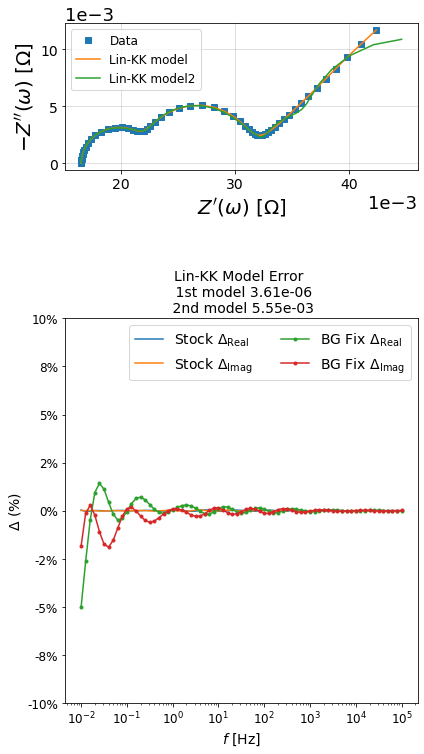

In [36]:
fig, (ax1, ax2)  = plt.subplots(nrows=2, figsize=(6,12))

# plot original data
plot_nyquist(ax1, sim_Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, sim_Z_linKK, fmt='-', scale=1e3, units='\Omega')
plot_nyquist(ax1, sim_Z_linKK2, fmt='-', scale=1e3, units='\Omega')


ax1.legend(['Data', 'Lin-KK model', 'Lin-KK model2'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(sim_f, sim_res_real, '-', label=r'Stock $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag, '-', label=r'Stock $\Delta_{\mathrm{Imag}}$')

ax2.plot(sim_f, sim_res_real2, '.-', label=r'BG Fix $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag2, '.-', label=r'BG Fix $\Delta_{\mathrm{Imag}}$')

ax2.set_title('Lin-KK Model Error ' + '\n 1st model %.2e' % np.sum(sim_res_real**2 + sim_res_imag**2)
              + '\n 2nd model %.2e' % np.sum(sim_res_real2**2 + sim_res_imag2**2), fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()

## Test with a circuit made of only RC elements

Simulating circuit based on initial parameters


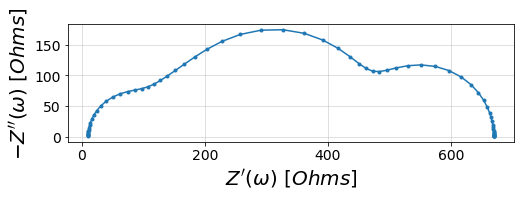

In [38]:
circ = 'R0-p(R1,C1)-p(R2,C2)-p(R3,C3)-p(R4,C4)'

vals = [10, 100, 1e-6, 60, 1e-5, 200, 3e-4, 300, 1e-5]

circuit = CustomCircuit(circ, initial_guess=vals)

sim_f = np.logspace(np.log10(1e5), np.log10(1e-2), num = 71)

sim_Z = circuit.predict(sim_f, use_initial=True)

fig, ax0 = plt.subplots(figsize=(8,8))
plot_nyquist(ax0, sim_Z)

In [39]:
# Using stock lin KK

sim_M, sim_mu, sim_Z_linKK, sim_res_real, sim_res_imag = linKK(sim_f, sim_Z, max_M=50)
print(sim_M, sim_mu, np.sum(sim_res_real**2), np.sum(sim_res_imag**2))

4 0.7982534681165763 3.7325256545674876 3.734210093112321


In [40]:
# Using my corrections to time constant assignment and spacing, 
# and converting to radial frequencies in the RC-element for lin-KK model
# now called H

sim_M2, sim_mu2, sim_Z_linKK2, sim_res_real2, sim_res_imag2 = linKK2(sim_f, sim_Z, max_M=50)
print(sim_M2, sim_mu2, np.sum(sim_res_real2**2), np.sum(sim_res_imag2**2))

10 0.9919063283771213 9.256595503334644
17 0.8191068838036469 0.0005690463734124967 0.0005689370775392358


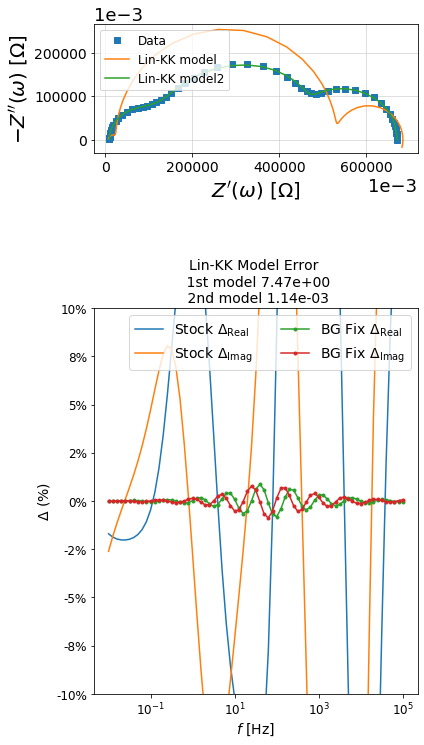

In [41]:
fig, (ax1, ax2)  = plt.subplots(nrows=2, figsize=(6,12))

# plot original data
plot_nyquist(ax1, sim_Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, sim_Z_linKK, fmt='-', scale=1e3, units='\Omega')
plot_nyquist(ax1, sim_Z_linKK2, fmt='-', scale=1e3, units='\Omega')


ax1.legend(['Data', 'Lin-KK model', 'Lin-KK model2'], loc=2, fontsize=12)

# Plot residuals
ax2.plot(sim_f, sim_res_real, '-', label=r'Stock $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag, '-', label=r'Stock $\Delta_{\mathrm{Imag}}$')

ax2.plot(sim_f, sim_res_real2, '.-', label=r'BG Fix $\Delta_{\mathrm{Real}}$')
ax2.plot(sim_f, sim_res_imag2, '.-', label=r'BG Fix $\Delta_{\mathrm{Imag}}$')

ax2.set_title('Lin-KK Model Error ' + '\n 1st model %.2e' % np.sum(sim_res_real**2 + sim_res_imag**2)
              + '\n 2nd model %.2e' % np.sum(sim_res_real2**2 + sim_res_imag2**2), fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylabel('$\Delta$ $(\%)$', fontsize=14)
ax2.set_xlabel('$f$ [Hz]', fontsize=14)
ax2.set_xscale('log')
ax2.set_ylim(-.1, .1)

ax2.legend(loc=1, fontsize=14, ncol=2)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.show()